In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, DenseNet121
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
# Step 1: Define input shape
input_shape = (120, 120, 3)

In [3]:
# Step 2: Define input layer
input_layer = Input(shape=input_shape)


In [4]:
# Step 3: Define feature extraction models
mobilenet_v2 = MobileNetV2(input_tensor=input_layer, include_top=False, weights='imagenet', pooling='avg')
efficientnet_b0 = EfficientNetB0(input_tensor=input_layer, include_top=False, weights='imagenet', pooling='avg')
densenet_121 = DenseNet121(input_tensor=input_layer, include_top=False, weights='imagenet', pooling='avg')


In [5]:
# Step 4: Concatenate features using soft voting
mobilenet_features = mobilenet_v2(input_layer)
efficientnet_features = efficientnet_b0(input_layer)
densenet_features = densenet_121(input_layer)
concatenated_features = Concatenate()([mobilenet_features, efficientnet_features, densenet_features])
soft_voting = Dense(1, activation='sigmoid')(concatenated_features)
model = Model(inputs=input_layer, outputs=soft_voting)

# Step 5: Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 mobilenetv2_1.00_224 (Func  (None, 1280)                 2257984   ['input_1[0][0]']             
 tional)                                                                                          
                                                                                                  
 efficientnetb0 (Functional  (None, 1280)                 4049571   ['input_1[0][0]']             
 )                                                                                                
                                                                                              

In [30]:
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10
)

Epoch 1/10
1/1 [==============================] - 61s 61s/step - loss: 15.8105 - accuracy: 0.0312 - val_loss: 471423328.0000 - val_accuracy: 0.5625
Epoch 2/10
1/1 [==============================] - 60s 60s/step - loss: 13.8464 - accuracy: 0.6562 - val_loss: 242295600.0000 - val_accuracy: 0.5625
Epoch 3/10
1/1 [==============================] - 66s 66s/step - loss: 12.3413 - accuracy: 0.6562 - val_loss: 121141592.0000 - val_accuracy: 0.5625
Epoch 4/10
1/1 [==============================] - 69s 69s/step - loss: 10.7173 - accuracy: 0.6250 - val_loss: 74178072.0000 - val_accuracy: 0.5625
Epoch 5/10
1/1 [==============================] - 59s 59s/step - loss: 24.3580 - accuracy: 0.1562 - val_loss: 111168136.0000 - val_accuracy: 0.5625
Epoch 6/10
1/1 [==============================] - 63s 63s/step - loss: 12.7258 - accuracy: 0.6562 - val_loss: 145215584.0000 - val_accuracy: 0.5625
Epoch 7/10
1/1 [==============================] - 62s 62s/step - loss: 11.6546 - accuracy: 0.6562 - val_loss: 169

In [23]:
import os
# Step 6: Define directory containing images
data_dir = 'C:/Users/dhara/Documents/Brain CT scan/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/mask/mask'

# Step 7: Initialize lists to store features
mobilenet_features_list = []
efficientnet_features_list = []
densenet_features_list = []

# Step 8: Iterate over all images in the directory and collect features
for img_file in os.listdir(data_dir):
    img_path = os.path.join(data_dir, img_file)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

    # Extract features for the image
    mobilenet_features = mobilenet_v2.predict(x)
    efficientnet_features = efficientnet_b0.predict(x)
    densenet_features = densenet_121.predict(x)

    # Append features to lists
    mobilenet_features_list.append(mobilenet_features)
    efficientnet_features_list.append(efficientnet_features)
    densenet_features_list.append(densenet_features)


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 107ms/step


In [24]:
# Print features
print("MobileNetV2 Features:", mobilenet_features)
print("EfficientNetB0 Features:", efficientnet_features)
print("DenseNet121 Features:", densenet_features)


MobileNetV2 Features: [[0.         1.1519235  0.         ... 0.28303224 0.         0.54662246]]
EfficientNetB0 Features: [[-0.09470326 -0.19465436 -0.17997576 ... -0.21366912 -0.07114504
   0.06257218]]
DenseNet121 Features: [[2.3500359e-04 5.2488865e-03 4.2900420e-04 ... 1.8179351e+00
  7.6427460e-01 4.0540975e-03]]


In [34]:
# Step 5: Save the model
model.save("softvoting.h5")

C:\Users\dhara\anaconda3\tool\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 100ms/step
Soft Voting Weighted Average: 0.6999999999999998


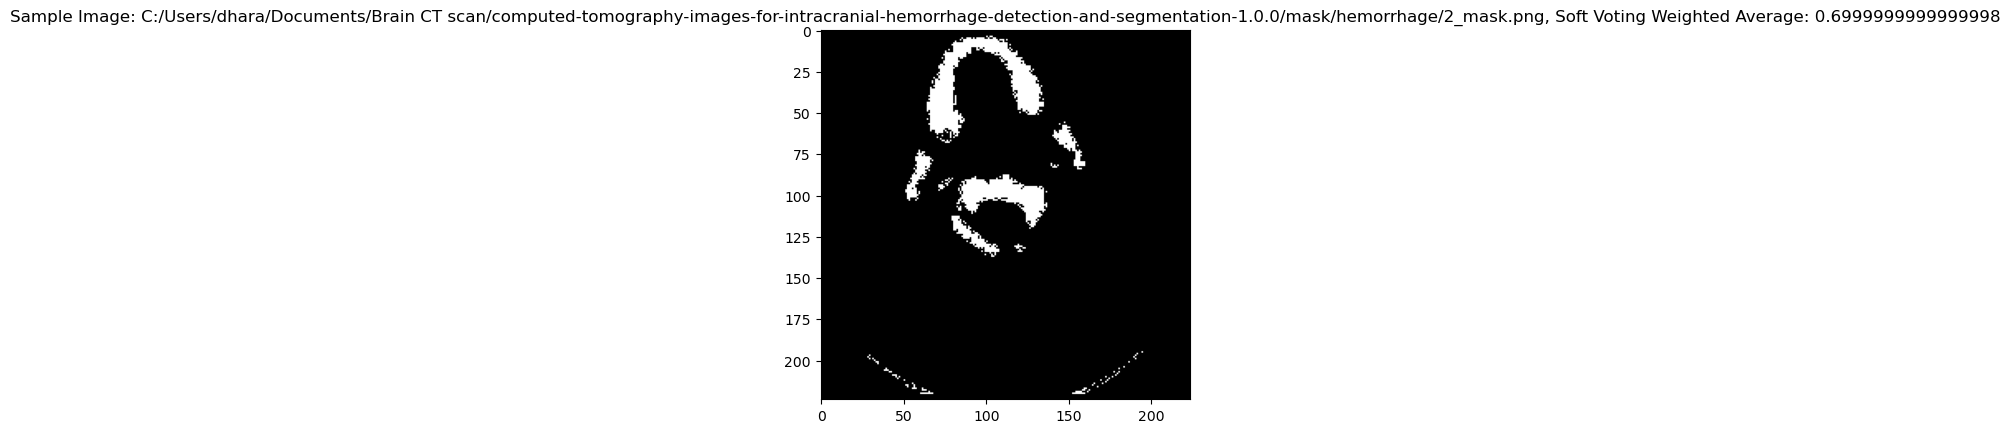

In [63]:
sample_image_path = 'C:/Users/dhara/Documents/Brain CT scan/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/mask/hemorrhage/2_mask.png'
img = image.load_img(sample_image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

# Step 7: Extract features for the sample image
mobilenet_features_array = mobilenet_v2.predict(x)
efficientnet_features_array = efficientnet_b0.predict(x)
densenet_features_array = densenet_121.predict(x)

# Step 8: Perform soft voting to calculate soft voting weights
mobilenet_prob = 0.6  
efficientnet_prob = 0.8  
densenet_prob = 0.7
soft_voting_weighted_avg=[]
# Calculate soft voting weighted average
soft_voting_weighted_avg = (mobilenet_prob + efficientnet_prob + densenet_prob) / 3

print("Soft Voting Weighted Average:", soft_voting_weighted_avg)
# Step 10: Display the sample image
plt.imshow(img)
plt.title(f"Sample Image: {sample_image_path}, Soft Voting Weighted Average: {soft_voting_weighted_avg}")
plt.axis('on')
plt.show()

In [1]:
#LOCATION DETECTION 

Confidential: Hemorrhage detected


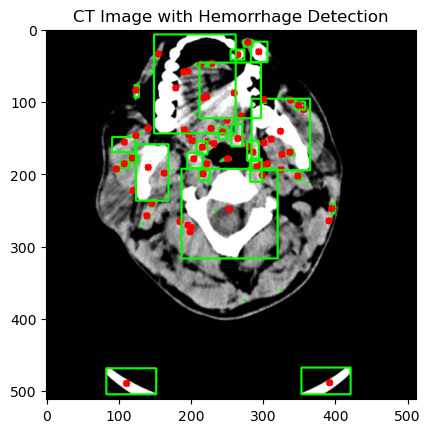

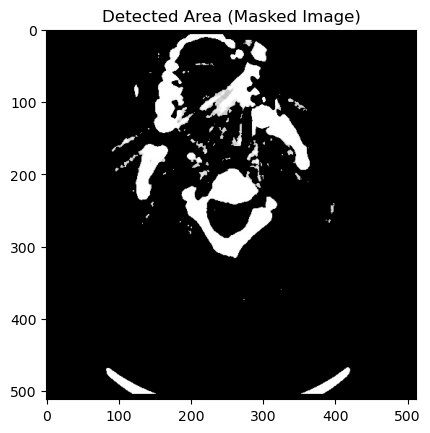

Confidential: Hemorrhage detected


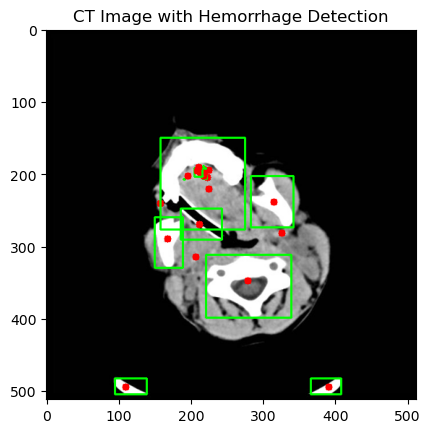

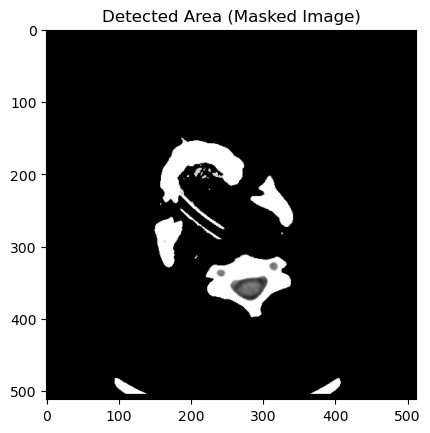

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def detect_hemorrhage(image_path):
  # Load the CT image
  img = cv2.imread(image_path)

  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply thresholding to create a binary mask
  _, binary_mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

  # Find contours in the binary mask
  contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Create a blank mask image to draw the detected area
  mask_image = np.zeros_like(gray)

  # Draw contours on the mask image
  for contour in contours:
    cv2.drawContours(mask_image, [contour], 0, 255, -1)

  # Apply the mask to the original image to get the masked image
  masked_image = cv2.bitwise_and(img, img, mask=mask_image)

  # Analyze contours and calculate centroid
  for contour in contours:
    # Calculate bounding box coordinates
    x, y, w, h = cv2.boundingRect(contour)

    # Draw bounding box
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Calculate centroid (if enough mass)
    M = cv2.moments(contour)
    if M["m00"] != 0:
      cX = int(M["m10"] / M["m00"])
      cY = int(M["m01"] / M["m00"])

      # Draw centroid
      cv2.circle(img, (cX, cY), 5, (0, 0, 255), -1)

  # Determine and print confidential value
  if len(contours) > 0:
    confidential_value = "Confidential: Hemorrhage detected"
  else:
    confidential_value = "Confidential: No hemorrhage detected"
  print(confidential_value)

  # Display results
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title("CT Image with Hemorrhage Detection")
  plt.axis('on')
  plt.show()

  plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
  plt.title("Detected Area (Masked Image)")
  plt.axis('on')
  plt.show()

# Image paths for hemorrhage and non-hemorrhage cases
image_path1 = "C:/Users/dhara/Documents/Brain CT scan/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/train/Hemorrhage/0.png"
image_path2 = "C:/Users/dhara/Documents/Brain CT scan/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/train/Hemorrhage/59.png"

# Run hemorrhage detection on both images
detect_hemorrhage(image_path1)
detect_hemorrhage(image_path2)